<h1><center>Laboratorio 10: Interpretabilidad ü§ñ</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebasti√°n Tinoco
- Ayudante: Arturo Lazcano, Angelo Mu√±oz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Mat√≠as L√≥pez
- Nombre de alumno 2: Jos√© Saffie


### **Link de repositorio de GitHub:** `https://github.com/JoseSaffie/MDS7202-1-Primavera-2023`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcci√≥n del laboratorio](#Descripci√≥n-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificaci√≥n usando `XGBoost`.
- M√©todos Agn√≥sticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- M√©todos Agn√≥sticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisar√°n entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificaci√≥n con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificaci√≥n.

El laboratorio deber√° ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al m√°ximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante m√°s eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Cl√≠nicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades cr√≥nicas, como la diabetes, decidi√≥ abrir una cl√≠nica especializada en el tratamiento de esta enfermedad en nuestro pa√≠s.

La cl√≠nica del Doctor Simi se convirti√≥ en un lugar donde los pacientes con diabetes podr√≠an recibir atenci√≥n m√©dica integral. El personal m√©dico estaba compuesto por especialistas en endocrinolog√≠a, nutrici√≥n y enfermer√≠a, todos capacitados en el manejo de la diabetes.

Sin embargo √©l se ha dado cuenta que los tiempos han cambiado y gracias a las tecnolog√≠as es posible generar mejores predicciones en la diabetes conociendo el historial m√©dico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus cl√≠nicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rog√≥ que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial m√©dico de las personas en forma de datos tabulares para que usted pueda realizar f√°cilmente la clasificaci√≥n.


In [31]:
import numpy as np
import pandas as pd
import random 

df = pd.read_csv('diabetes_data.csv')
df.head(4)

np.random.seed(420)


In [2]:
for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f'Valores √∫nicos en {columna}: {valores_unicos}')

Valores √∫nicos en Age: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
Valores √∫nicos en Sex: [1. 0.]
Valores √∫nicos en HighChol: [0. 1.]
Valores √∫nicos en CholCheck: [1. 0.]
Valores √∫nicos en BMI: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Valores √∫nicos en Smoker: [0. 1.]
Valores √∫nicos en HeartDiseaseorAttack: [0. 1.]
Valores √∫nicos en PhysActivity: [1. 0.]
Valores √∫nicos en Fruits: [0. 1.]
Valores √∫nicos en Veggies: [1. 0.]
Valores √∫nicos en HvyAlcoholConsump: [0. 1.]
Valores √∫nicos en GenHlth: [3. 1. 2. 4. 5.]
Valores √∫nicos en MentHlth: [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
Valores √∫nicos en Phy

## 2. Clasificaci√≥n de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¬øEs acaso un buen predictor de diabetes?, ¬øQu√© buscan explicar las m√©tricas utilizadas?, ¬ølas m√©tricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elecci√≥n de las features?. 

In [3]:
#!pip install xgboost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

In [4]:
# Inserte su c√≥digo aqu√≠

X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Lo hacemos a mano la categorizacion, a traves de un print anterior de todos los valores unicos por columna distinguimos aquellos que son numericos y categoricos
numeric_features = ['BMI', 'MentHlth','PhysHlth']
categorical_features_listas = ['Sex','HighChol',	'CholCheck',	'Smoker'	,'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies'	,'HvyAlcoholConsump'		,'DiffWalk'	,'Stroke'	,'HighBP']
categorical_features = ['Age','GenHlth']
#print(categorical_features)


# Crear el preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('c2', OneHotEncoder(), categorical_features),
        ('c1', 'passthrough', categorical_features_listas)
        
    ]
      # Conserva las caracter√≠sticas no especificadas)
)

# Crear el pipeline con el preprocesador y el clasificador XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo (incluida la divisi√≥n de datos)
pipeline.fit(X_train, y_train)


# Probamos el modelo

from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Imprimir el informe de clasificaci√≥n
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Comente sus decisiones y los resultados obtenidos con el modelo. ¬øEs acaso un buen predictor de diabetes?, ¬øQu√© buscan explicar las m√©tricas utilizadas?, ¬ølas m√©tricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elecci√≥n de las features?.

Lo primero fue hacer un one hot encoding, pero habian varias columnas listas , por lo que le hacemos cambio solo a algunas

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para a√±adir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los m√©todos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¬øLos resultados obtenidos con los diferentes m√©todos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¬ølas importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza √°rboles? ¬øQu√© debilidad presenta este m√©todo?

In [5]:
datos_antes = pipeline.named_steps['preprocessor']

data_transformed = preprocessor.fit_transform(df)
print(data_transformed)
# Obt√©n los nombres de las columnas transformadas
column_names = preprocessor.get_feature_names_out()

# Convierte los nombres de las columnas a una lista
column_names_list = column_names.tolist()
print(column_names_list)

[[-0.54217564  0.15301974  2.40400793 ...  0.          0.
   1.        ]
 [-0.54217564 -0.46005828 -0.57745057 ...  0.          1.
   1.        ]
 [-0.54217564 -0.46005828  0.41636893 ...  0.          0.
   0.        ]
 ...
 [-0.68274544  1.37917577 -0.57745057 ...  1.          0.
   1.        ]
 [-1.66673405 -0.46005828 -0.57745057 ...  1.          0.
   1.        ]
 [-0.68274544 -0.46005828 -0.57745057 ...  0.          0.
   1.        ]]
['num__BMI', 'num__MentHlth', 'num__PhysHlth', 'c2__Age_1.0', 'c2__Age_2.0', 'c2__Age_3.0', 'c2__Age_4.0', 'c2__Age_5.0', 'c2__Age_6.0', 'c2__Age_7.0', 'c2__Age_8.0', 'c2__Age_9.0', 'c2__Age_10.0', 'c2__Age_11.0', 'c2__Age_12.0', 'c2__Age_13.0', 'c2__GenHlth_1.0', 'c2__GenHlth_2.0', 'c2__GenHlth_3.0', 'c2__GenHlth_4.0', 'c2__GenHlth_5.0', 'c1__Sex', 'c1__HighChol', 'c1__CholCheck', 'c1__Smoker', 'c1__HeartDiseaseorAttack', 'c1__PhysActivity', 'c1__Fruits', 'c1__Veggies', 'c1__HvyAlcoholConsump', 'c1__DiffWalk', 'c1__Stroke', 'c1__HighBP']


In [6]:
for indice, elemento in enumerate(column_names_list):
    print(f"Posici√≥n {indice }: {elemento}")

Posici√≥n 0: num__BMI
Posici√≥n 1: num__MentHlth
Posici√≥n 2: num__PhysHlth
Posici√≥n 3: c2__Age_1.0
Posici√≥n 4: c2__Age_2.0
Posici√≥n 5: c2__Age_3.0
Posici√≥n 6: c2__Age_4.0
Posici√≥n 7: c2__Age_5.0
Posici√≥n 8: c2__Age_6.0
Posici√≥n 9: c2__Age_7.0
Posici√≥n 10: c2__Age_8.0
Posici√≥n 11: c2__Age_9.0
Posici√≥n 12: c2__Age_10.0
Posici√≥n 13: c2__Age_11.0
Posici√≥n 14: c2__Age_12.0
Posici√≥n 15: c2__Age_13.0
Posici√≥n 16: c2__GenHlth_1.0
Posici√≥n 17: c2__GenHlth_2.0
Posici√≥n 18: c2__GenHlth_3.0
Posici√≥n 19: c2__GenHlth_4.0
Posici√≥n 20: c2__GenHlth_5.0
Posici√≥n 21: c1__Sex
Posici√≥n 22: c1__HighChol
Posici√≥n 23: c1__CholCheck
Posici√≥n 24: c1__Smoker
Posici√≥n 25: c1__HeartDiseaseorAttack
Posici√≥n 26: c1__PhysActivity
Posici√≥n 27: c1__Fruits
Posici√≥n 28: c1__Veggies
Posici√≥n 29: c1__HvyAlcoholConsump
Posici√≥n 30: c1__DiffWalk
Posici√≥n 31: c1__Stroke
Posici√≥n 32: c1__HighBP


<Figure size 2000x1600 with 0 Axes>

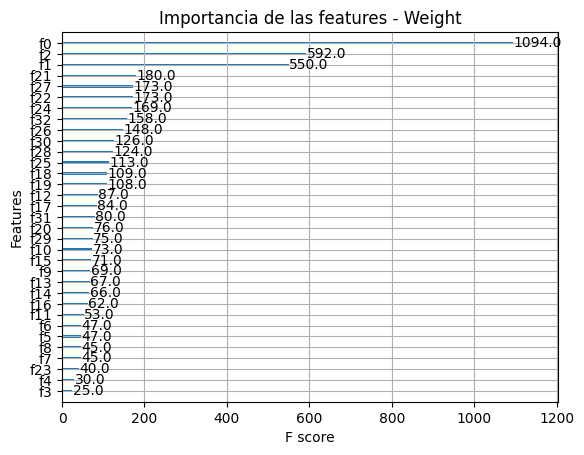

<Figure size 1000x800 with 0 Axes>

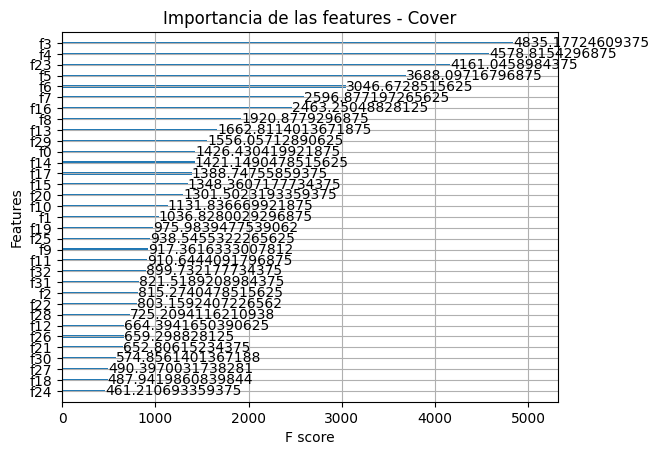

<Figure size 1000x800 with 0 Axes>

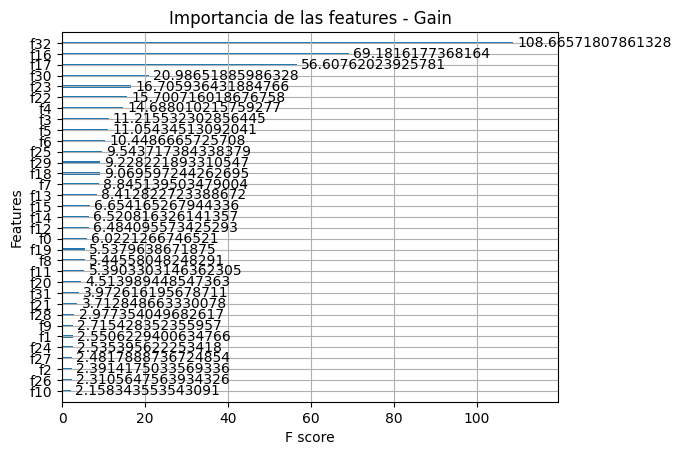

In [7]:
# Inserte su c√≥digo aqu√≠
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt


classifier = pipeline.named_steps['classifier']
# Visualizar la importancia usando el m√©todo 'weight'
plt.figure(figsize=(20, 16))
xgb.plot_importance(classifier, importance_type='weight')
plt.title('Importancia de las features - Weight')
plt.show()

# Visualizar la importancia usando el m√©todo 'cover'
plt.figure(figsize=(10, 8))
xgb.plot_importance(classifier, importance_type='cover')
plt.title('Importancia de las features - Cover')
plt.show()

# Visualizar la importancia usando el m√©todo 'gain'
plt.figure(figsize=(10, 8))
xgb.plot_importance(classifier, importance_type='gain')
plt.title('Importancia de las features - Gain')
plt.show()

# M√°s arriba puse que es cada fxx

## 4. M√©todos Agn√≥sticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la secci√≥n anterior, Dr. Simi le pide implementar un **m√©todo de permutaci√≥n** que le permita observar la importancia de las features. Visualice los resultados de este m√©todo en un gr√°fico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviaci√≥n est√°ndar de sus resultados (¬øQu√© se√±ala est√°?). Adem√°s, responda las siguientes preguntas:


- ¬øC√≥mo mide la importancia de las features su propuesta?
- ¬øQu√© features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¬øTienen sentido?
- ¬øC√≥mo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del m√©todo implementado.

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy del modelo base: 0.7475776221797864
Desviaci√≥n est√°ndar de las m√©tricas despu√©s de la permutaci√≥n: 0.0021037562004666303


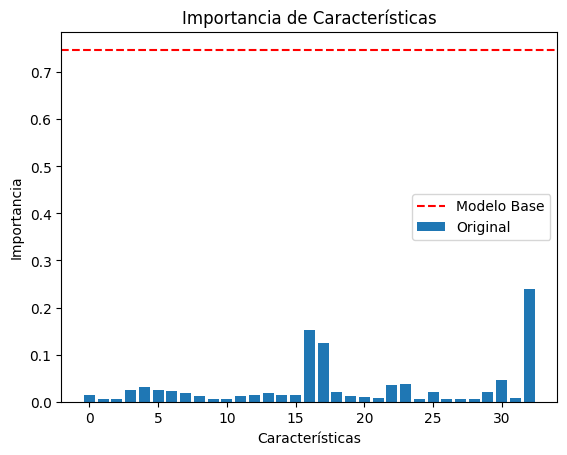

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Lo hacemos a mano la categorizacion, a traves de un print anterior de todos los valores unicos por columna distinguimos aquellos que son numericos y categoricos
numeric_features = ['BMI', 'MentHlth','PhysHlth']
categorical_features_listas = ['Sex','HighChol',	'CholCheck',	'Smoker'	,'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies'	,'HvyAlcoholConsump'		,'DiffWalk'	,'Stroke'	,'HighBP']
categorical_features = ['Age','GenHlth']
#print(categorical_features)


# Crear el preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('c2', OneHotEncoder(), categorical_features),
        ('c1', 'passthrough', categorical_features_listas)
        
    ]
      # Conserva las caracter√≠sticas no especificadas)
)

# Crear el pipeline con el preprocesador y el clasificador XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo (incluida la divisi√≥n de datos)
pipeline.fit(X_train, y_train)


# Probamos el modelo

from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Imprimir el informe de clasificaci√≥n
print(classification_report(y_test, y_pred))

# Entrenar el modelo base
pipeline.fit(X_train, y_train)

# Evaluar el modelo base
base_score = accuracy_score(y_test, pipeline.predict(X_test))
print("Accuracy del modelo base:", base_score)

# N√∫mero de iteraciones para permutaci√≥n
num_iterations = 30
permuted_scores = []


# Realizar permutaci√≥n y evaluar el modelo varias veces
for i in range(num_iterations):
    # Obtener el nombre de la primera caracter√≠stica
    feature_to_permute = numeric_features[0]

    # Crear una copia del DataFrame para no modificar el original
    permuted_X_test = X_test.copy()

    # Permutar los valores de la primera caracter√≠stica
    permuted_X_test[feature_to_permute] = np.random.permutation(permuted_X_test[feature_to_permute].values)

    # Copiar el modelo para no modificar el modelo base
    permuted_pipeline = pipeline.named_steps['classifier'].__class__(**pipeline.named_steps['classifier'].get_params())

    # Entrenar el modelo despu√©s de la permutaci√≥n
    permuted_pipeline.fit(X_train, y_train)

    # Evaluar el modelo despu√©s de la permutaci√≥n
    permuted_score = accuracy_score(y_test, permuted_pipeline.predict(permuted_X_test))
    permuted_scores.append(permuted_score)


# Calcular la desviaci√≥n est√°ndar de los resultados de la permutaci√≥n
std_deviation = np.std(permuted_scores)
print("Desviaci√≥n est√°ndar de las m√©tricas despu√©s de la permutaci√≥n:", std_deviation)

# Visualizar la importancia de las caracter√≠sticas
# Asumo que tu modelo est√° dentro del preprocesador en el pipeline
classifier = pipeline.named_steps['classifier']

# Obtener la importancia de las caracter√≠sticas
feature_importances = classifier.feature_importances_

# Crear un gr√°fico de barras
plt.bar(range(len(feature_importances)), feature_importances, label='Original')
plt.axhline(y=base_score, color='r', linestyle='--', label='Modelo Base')
plt.title('Importancia de Caracter√≠sticas')
plt.xlabel('Caracter√≠sticas')
plt.ylabel('Importancia')
plt.legend()
plt.show()

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy del modelo base: 0.7475776221797864
Desviaci√≥n est√°ndar de las m√©tricas despu√©s de la permutaci√≥n: 0.0027017057968742077


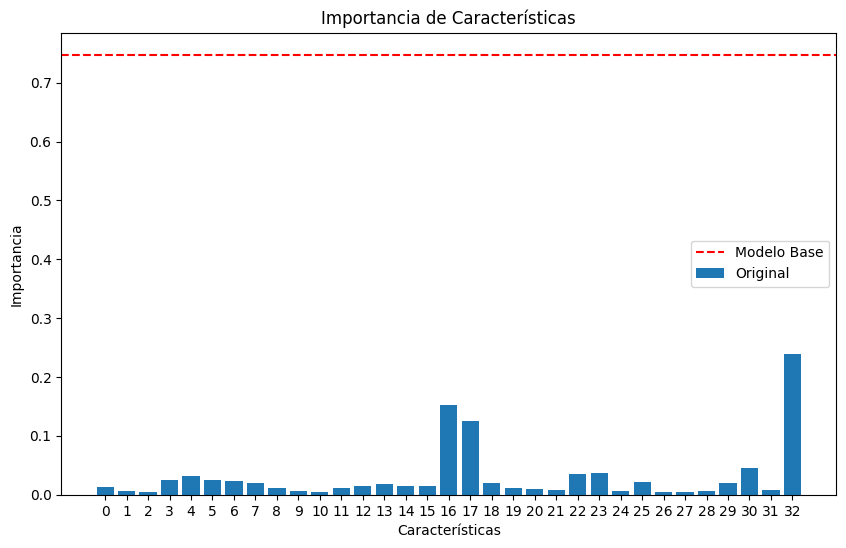

In [9]:
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Lo hacemos a mano la categorizacion, a traves de un print anterior de todos los valores unicos por columna distinguimos aquellos que son numericos y categoricos
numeric_features = ['BMI', 'MentHlth','PhysHlth']
categorical_features_listas = ['Sex','HighChol',	'CholCheck',	'Smoker'	,'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies'	,'HvyAlcoholConsump'		,'DiffWalk'	,'Stroke'	,'HighBP']
categorical_features = ['Age','GenHlth']
#print(categorical_features)


# Crear el preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('c2', OneHotEncoder(drop='if_binary'), categorical_features),
        ('c1', 'passthrough', categorical_features_listas)
        
    ]
      # Conserva las caracter√≠sticas no especificadas)
)

# Crear el pipeline con el preprocesador y el clasificador XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo (incluida la divisi√≥n de datos)
pipeline.fit(X_train, y_train)


# Probamos el modelo

from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Imprimir el informe de clasificaci√≥n
print(classification_report(y_test, y_pred))

# Entrenar el modelo base
pipeline.fit(X_train, y_train)

# Evaluar el modelo base
base_score = accuracy_score(y_test, pipeline.predict(X_test))
print("Accuracy del modelo base:", base_score)


import joblib
# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(pipeline, 'modelo_1.pkl')

# N√∫mero de iteraciones para permutaci√≥n
num_iterations = 30
permuted_scores = []


# Realizar permutaci√≥n y evaluar el modelo varias veces
for i in range(num_iterations):
    # Obtener el nombre de la primera caracter√≠stica
    feature_to_permute = numeric_features[0]

    # Crear una copia del DataFrame para no modificar el original
    permuted_X_test = X_test.copy()

    # Permutar los valores de la primera caracter√≠stica
    permuted_X_test[feature_to_permute] = np.random.permutation(permuted_X_test[feature_to_permute].values)

    # Copiar el modelo para no modificar el modelo base
    permuted_pipeline = pipeline.named_steps['classifier'].__class__(**pipeline.named_steps['classifier'].get_params())

    # Entrenar el modelo despu√©s de la permutaci√≥n
    permuted_pipeline.fit(X_train, y_train)

    # Evaluar el modelo despu√©s de la permutaci√≥n
    permuted_score = accuracy_score(y_test, permuted_pipeline.predict(permuted_X_test))
    permuted_scores.append(permuted_score)


# Calcular la desviaci√≥n est√°ndar de los resultados de la permutaci√≥n
std_deviation = np.std(permuted_scores)
print("Desviaci√≥n est√°ndar de las m√©tricas despu√©s de la permutaci√≥n:", std_deviation)

# Visualizar la importancia de las caracter√≠sticas
# Asumo que tu modelo est√° dentro del preprocesador en el pipeline
classifier = pipeline.named_steps['classifier']

# Obtener la importancia de las caracter√≠sticas
feature_importances = classifier.feature_importances_

# Obtener el n√∫mero correcto de caracter√≠sticas despu√©s del preprocesamiento
num_features_after_preprocessing = len(feature_importances)

# Ajustar el tama√±o de la figura
plt.figure(figsize=(10, 6))

# Crear un gr√°fico de barras
plt.bar(range(num_features_after_preprocessing), feature_importances, tick_label=np.arange(num_features_after_preprocessing), label='Original')

# L√≠nea punteada para el modelo base
plt.axhline(y=base_score, color='r', linestyle='--', label='Modelo Base')

# Configuraci√≥n del gr√°fico
plt.title('Importancia de Caracter√≠sticas')
plt.xlabel('Caracter√≠sticas')
plt.ylabel('Importancia')
plt.legend()

# Mostrar el gr√°fico
plt.show()

## 5. M√©todos Agn√≥sticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber c√≥mo funciona el modelo de predicci√≥n a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmac√©utico le pide calcular los *shap values* de su modelo. ¬øQu√© representa cada n√∫mero en su resultado? ¬øEs posible atribuir un significado a la positividad/negatividad de cada valor?

In [10]:
#pip show xgboost

In [11]:
#!pip install shap

In [12]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [13]:
# Obtener el modelo XGBoost del pipeline
#xgb_model = pipeline.named_steps['classifier']

ft_names = preprocessor.get_feature_names_out()

X_test2 = pd.DataFrame(preprocessor.transform(X_test), columns=ft_names)
xgb_model = pipeline.named_steps['classifier']


In [14]:

import shap

shap.initjs()

# Crear un objeto explainer de SHAP con el modelo XGBoost y los datos de entrenamiento

explainer = shap.TreeExplainer(xgb_model)

# Calcular los SHAP values para todo el conjunto de prueba
#shap_values = explainer.shap_values(X, y=y.values)
shap_values = explainer.shap_values(X_test2)


[18:10:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


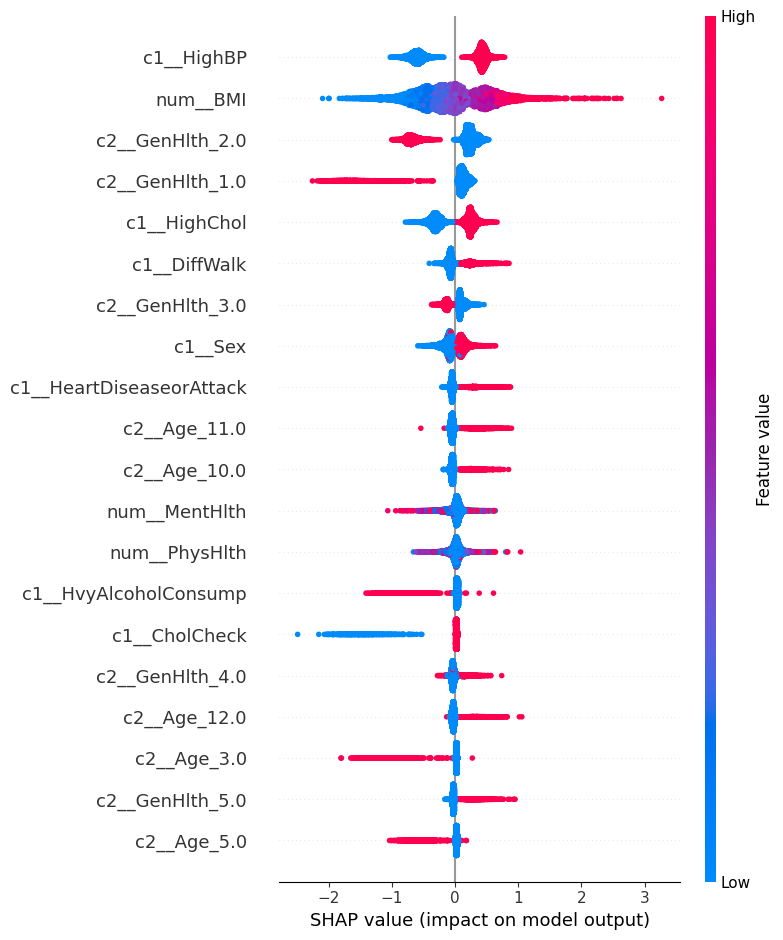

In [15]:
shap.initjs()
shap.summary_plot(shap_values, X_test2)

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¬øQu√© variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¬øExiste alg√∫n patr√≥n com√∫n entre las instancias analizadas? 
- ¬øEs posible generalizar estas conclusiones a todo el dataset?

In [16]:
# Inserte c√≥digo para generar gr√°ficos de aporte local aqu√≠
shap.initjs()
# Seleccionar las instancias espec√≠ficas
instancia_1 = 1
instancia_9 = 9
instancia_150 = 150

# Visualizar el aporte de las variables para la instancia 1
shap.force_plot(explainer.expected_value, shap_values[instancia_1, :], X_test2.iloc[instancia_1, :])

In [17]:
shap.initjs()
# Visualizar el aporte de las variables para la instancia 9
shap.force_plot(explainer.expected_value, shap_values[instancia_9, :], X_test2.iloc[instancia_9, :])

In [18]:
shap.initjs()
# Visualizar el aporte de las variables para la instancia 150
shap.force_plot(explainer.expected_value, shap_values[instancia_150, :], X_test2.iloc[instancia_150, :])

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualizaci√≥n donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¬øQu√© diferencias existen con las conclusiones generadas a nivel de instancia?

In [19]:
# Inserte c√≥digo para generar gr√°ficos de aporte global aqu√≠
shap.initjs()
# Graficar el aporte global de las variables utilizando shap.plots.force
shap.plots.force(explainer.expected_value, shap_values[:500])

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gr√°fico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¬øQu√© puede concluir de sus resultados?

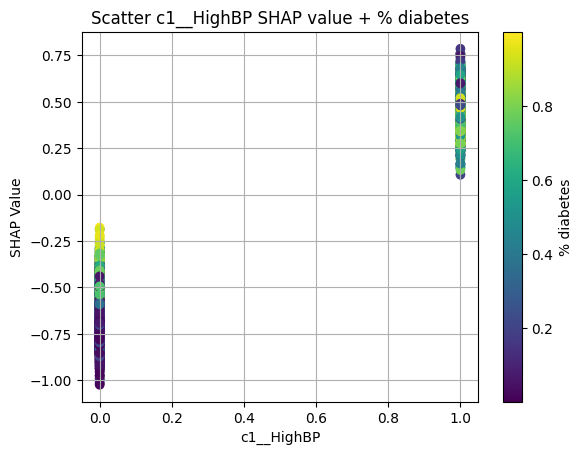

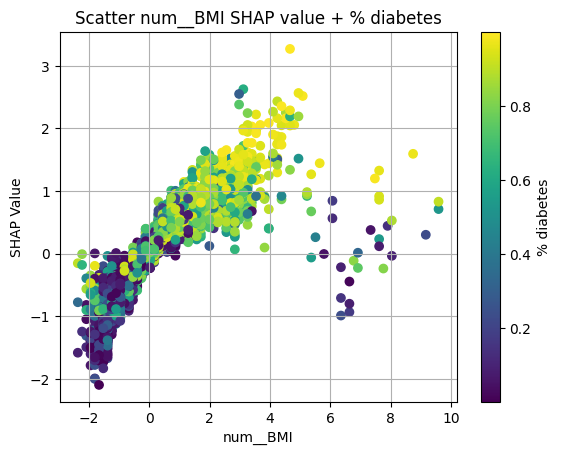

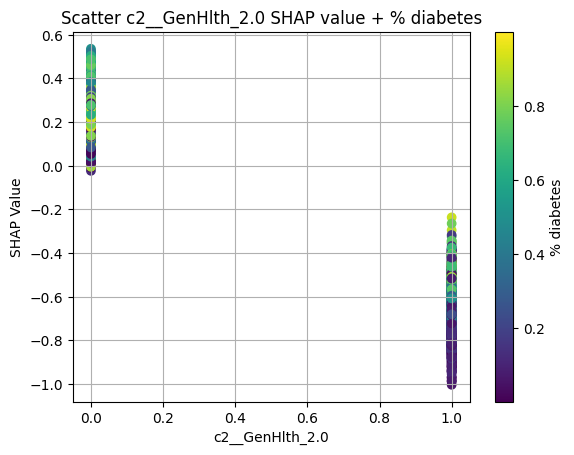

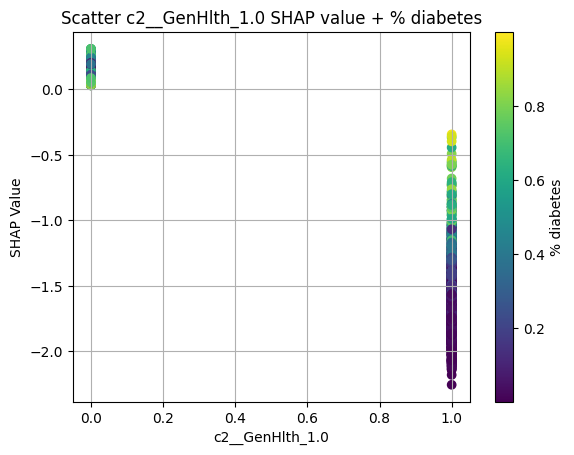

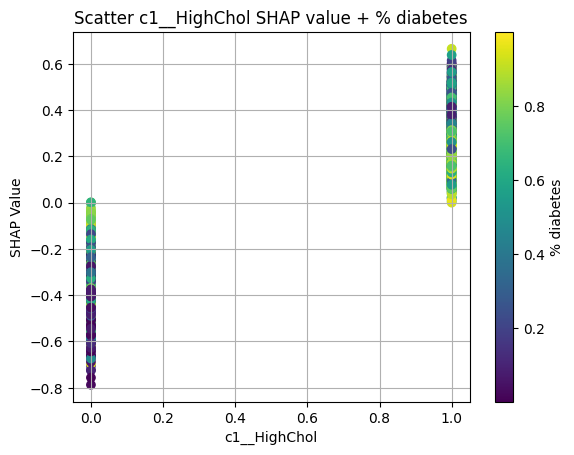

In [63]:
# Los 5 mas importantes c1__HighBP , num__BMI, c2__GenHlth_2.0, c2__GenHlth_1.0, c1__HighChol
lista_mas_impacto = ['c1__HighBP' , 'num__BMI', 'c2__GenHlth_2.0', 'c2__GenHlth_1.0', 'c1__HighChol']

# calculamos las %s
pr = xgb_model.predict_proba(X_test2)[:, 1]

# Generar gr√°ficos de dispersi√≥n para las 5 features mas impactantes
for feature in lista_mas_impacto:
    plt.scatter(X_test2[feature], shap_values[:, X_test2.columns.get_loc(feature)], c=pr)
    plt.colorbar(label='% diabetes')
    plt.xlabel(feature)
    plt.ylabel('SHAP Value')
    plt.title(f'Scatter {feature} SHAP value + % diabetes')
    plt.grid(True)
    plt.show()

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gr√°fico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¬øQu√© relaci√≥n existe entre la salida promedio del modelo y cada feature analizada? ¬øSon estas conclusiones generalizables para todo el conjunto de datos?

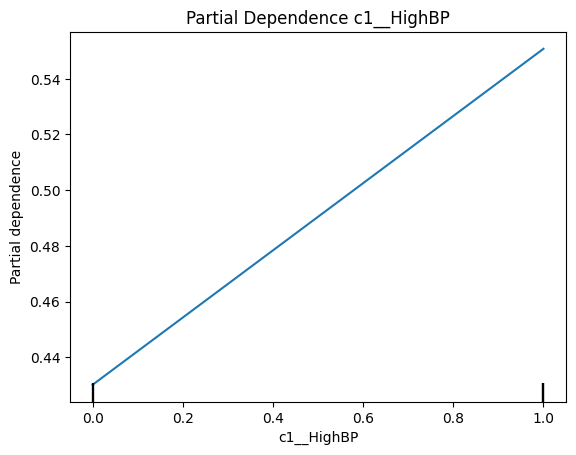

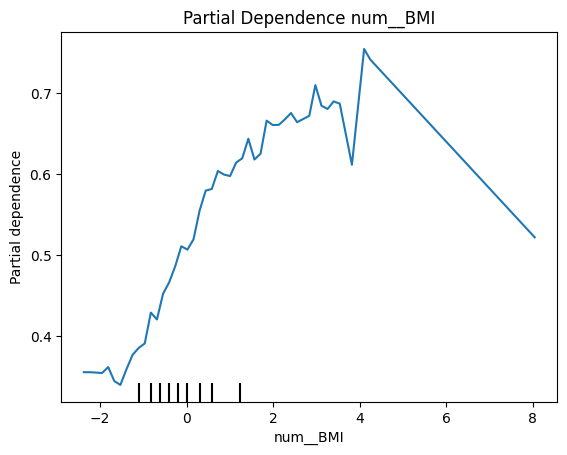

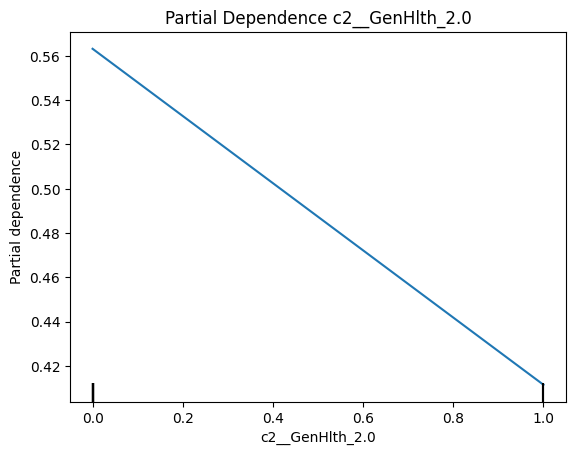

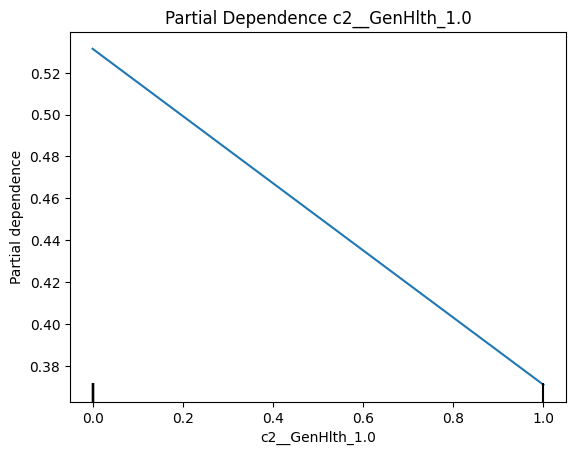

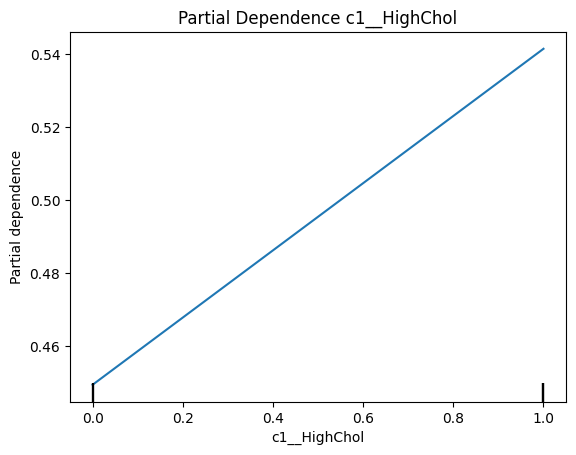

In [64]:
from sklearn.inspection import PartialDependenceDisplay

# Seleccionar las primeras 1000 observaciones para la submuestra
submuestra_indices = np.random.choice(len(X_test2), 1000, replace=False)
X_submuestra = X_test2.iloc[submuestra_indices, :]

# Creamos un plot por cada caso de las 5 variables
for feature in lista_mas_impacto:
    fig, ax = plt.subplots() 
    PartialDependenceDisplay.from_estimator( xgb_model, X_submuestra, [feature], ax=ax, kind='average')
    ax.set_title(f"Partial Dependence {feature}")
    plt.show()

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Despu√©s de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisi√≥n tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas se√±ale a **cu√°nta poblaci√≥n** es posible explicar con estas reglas e indique la **precisi√≥n** que poseen las reglas en la totalidad de los datos. ¬øTienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta se√±alando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

In [66]:

from alibi.explainers import AnchorTabular

In [68]:
# Select specific instances
# Obtener el modelo XGBoost del pipeline
xgb_model = pipeline.named_steps['classifier']

instances_to_explain = [1000, 3001, 5751]
#X_instances = X_test[instances_to_explain]

# Define list of all feature names
feature_names = [   'f1',
    'f2',    'f3',    'f4',    'f5',    'f6',
    'f7',     'f8',    'f9',
    'f10',    'f11',
    'f12',    'f13',
    'f14',    'f15',
    'f16',    'f17',
    'f18',    'f19',
    'f20',    'f21',
    'f22',    'f23',
    'f24',    'f25',
    'f26',    'f27',
    'f28',    'f29',
    'f30',    'f31',
    'f32',    'f33',
]

# Initialize the explainer with all feature names
explainer = AnchorTabular(xgb_model.predict(), feature_names=feature_names)

# Fit the explainer
explainer.fit(X_test)

# Generate explanations for each selected instance
for i, instance in enumerate(X_instances):
    explanation = explainer.explain(instance)
    print(f'Explanation for instance {instances_to_explain[i]}:')
    print('Anchor: %s' % (' AND '.join(explanation.anchor['feature'])))
    print('\n')

TypeError: XGBClassifier.predict() missing 1 required positional argument: 'X'

In [78]:
# Obtener el modelo XGBoost del pipeline
xgb_model = pipeline.named_steps['classifier']

def predict_fn(input_data):
    return xgb_model.predict(input_data)


ft_names = preprocessor.get_feature_names_out()
explainer = AnchorTabular(predict_fn, ft_names, seed=1)
explainer.fit(X_train.to_numpy())


#indices a procesar
idx_values = [1000, 3001, 5751]

class_names = ["0", "1"]

for idx in idx_values:
    print(f"\nExplanation for instance at index {idx}:")
    print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
    explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
    print('Anchor: %s' % (' AND '.join(explanation.anchor)))
    print('Precision: %.2f' % explanation.precision)
    print('Coverage: %.2f' % explanation.coverage)

IndexError: index 17 is out of bounds for axis 1 with size 17

In [ ]:
# Inserte su c√≥digo para generar sistema de reglas aqu√≠

#idx = 1000
# explicar predicci√≥n idx 1000

#idx = 3001
# explicar predicci√≥n idx 3001

#idx = 5751
# explicar predicci√≥n idx 5751

# Retrospectiva... (1.0 puntos)

En base a los diferentes m√©todos que implementa y ha comentado en este laboratorio, comente qu√© m√©todos le permiten entregar mejores conclusiones para la tarea de clasificaci√≥n de diabetes. Por otro lado, ¬øqu√© m√©todos son m√°s √∫tiles para el problema del doctor Simi, m√©todos agnosticos locales o globales?

> Fundamente su Respuesta aqu√≠

# Conclusi√≥n
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>